# Home Price Prediction Using Linear Regression and Random Forest

Based on the project by NeuralNine on YouTube (https://youtu.be/Wqmtf9SA_kk?si=wHYSG-BgxaOEdx4P).

Data used is provided by Cam Nugent on Kaggle (https://www.kaggle.com/datasets/camnugent/california-housing-prices).

This project was completed as the capstone project for my Codecademy Data Scientist: Machine Learning Specialist professional certification.

Robert Hall

01/14/2025

### Table of Contents:

1. Data Preparation and Feature Engineering
2. Linear Regression Model to Predict `median_house_value`
3. Random Forest Regressor Model to Predict `median_house_value`

### 1. Data Preparation and Feature Engineering

#### Importing Data and Core Libraries

In [274]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
# import data
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Handling Null Values

In [276]:
# check for null values and alterable datatypes
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [277]:
# drop records with null values, saving all non-null records in place of the original dataset
housing.dropna(inplace=True)

In [278]:
# recheck information about each feature
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Splitting Dataset into Training and Test Sets

In [279]:
# split data into training and test data for linear regression and random forest models
from sklearn.model_selection import train_test_split
X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [280]:
# get joint training and test sets on both input features and target
training_set = x_train.join(y_train)

#### Checking and Adjusting the Distributions and Correlations of Features

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

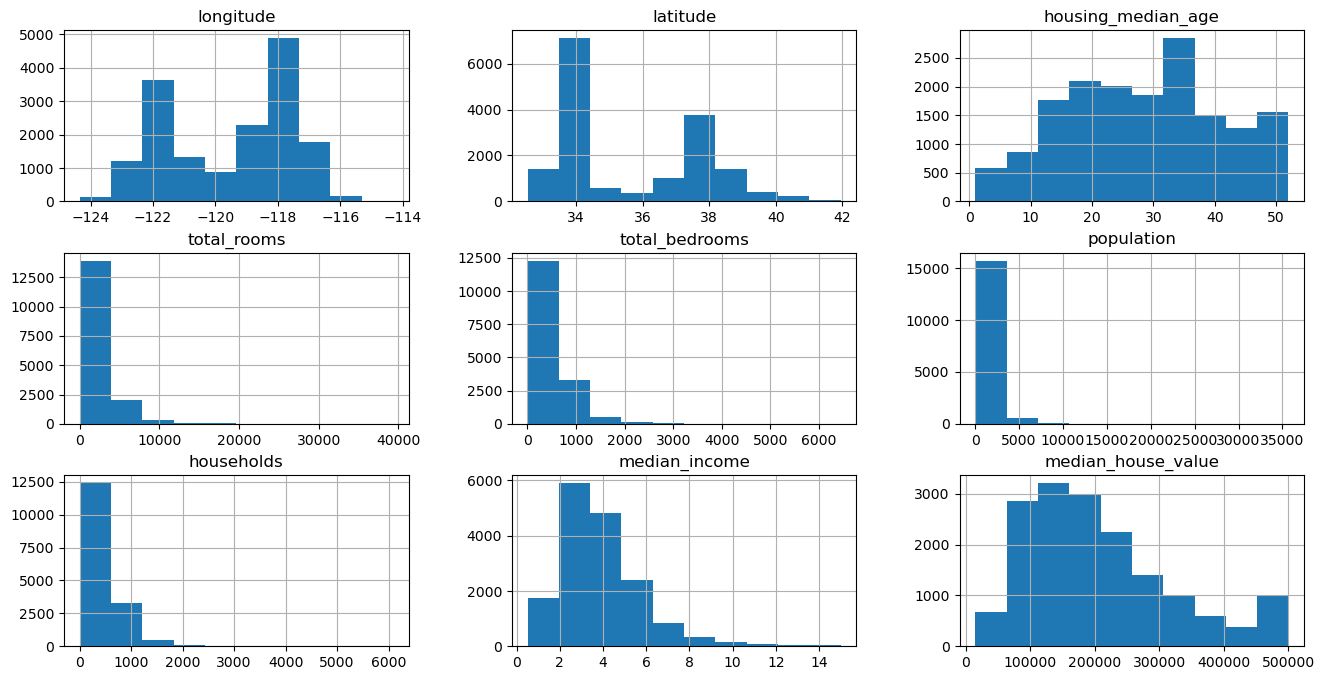

In [281]:
# visualize distributions of each feature in the training set
training_set.hist(figsize=(16, 8))

<Axes: title={'center': 'Correlation Heatmap of Housing Training Set, Less `ocean_proximity`'}>

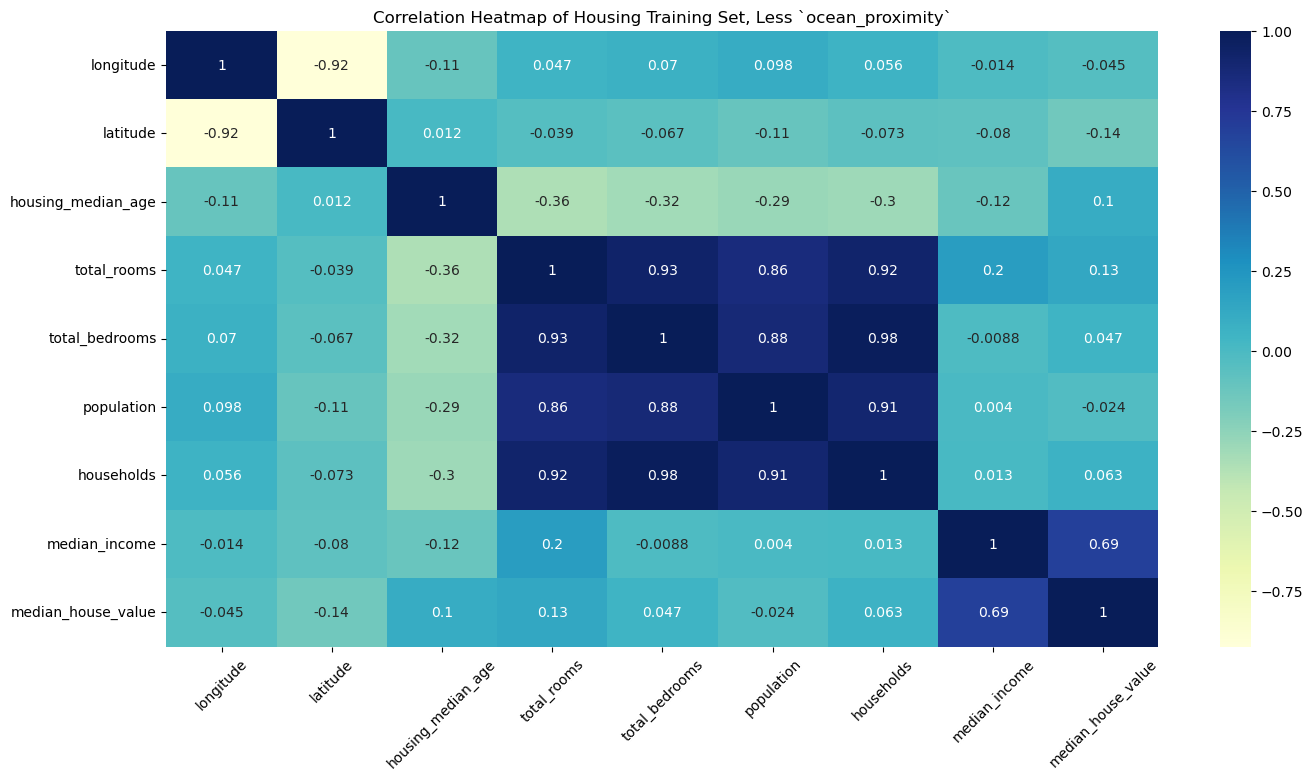

In [282]:
# plot a heatmap showing the correlations between each feature for selectivity purposes, excluding object-type ocean_proximity
no_ocean_prox = training_set.drop(columns=['ocean_proximity'])
plt.figure(figsize=(16, 8))
plt.title('Correlation Heatmap of Housing Training Set, Less `ocean_proximity`')
plt.xticks(rotation=45)
sns.heatmap(no_ocean_prox.corr(), annot=True, cmap='YlGnBu')

Note: In regards to the `median_house_value` target variable, `median_income` has the highest correlation coefficient (by far) at `0.69`

In [283]:
# take the log of the total_rooms, total_bedrooms, population, and households features to adjust skewed distributions
training_set['total_rooms'] = np.log(training_set['total_rooms'] + 1)
training_set['total_bedrooms'] = np.log(training_set['total_bedrooms'] + 1)
training_set['population'] = np.log(training_set['population'] + 1)
training_set['households'] = np.log(training_set['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

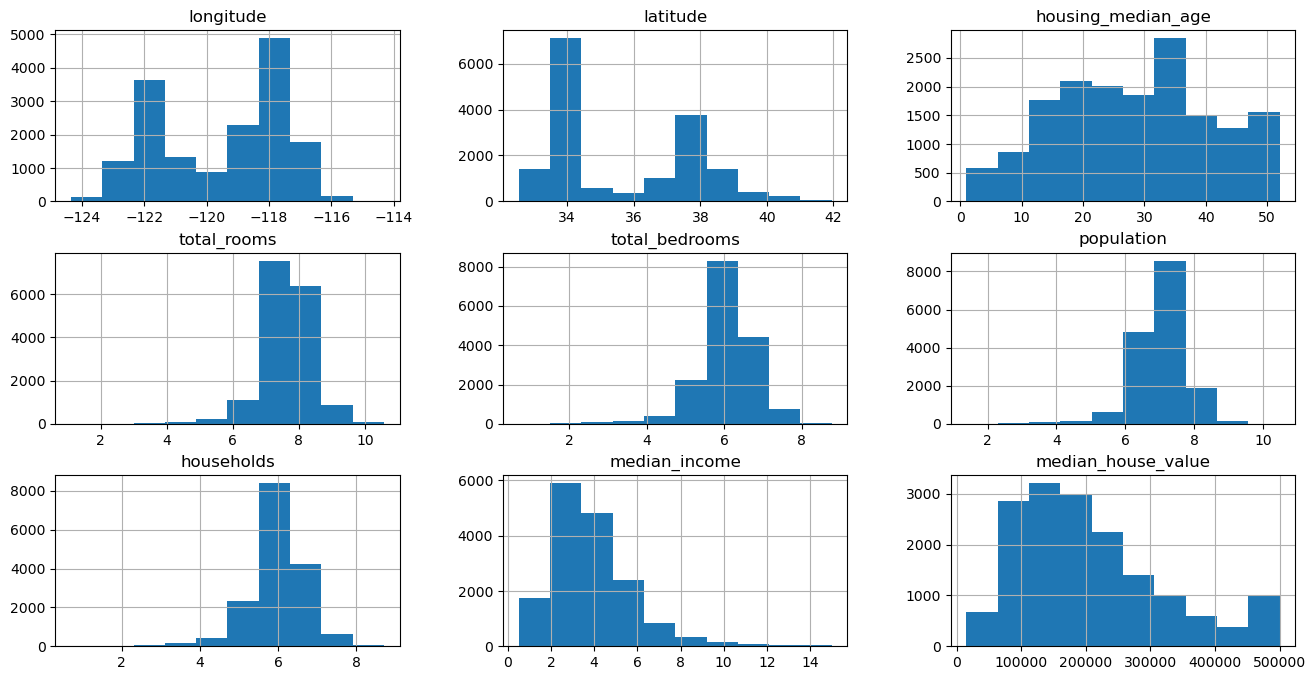

In [284]:
# re-plot training set features to ensure distributions were properly adjusted to appear approximately-Gaussian
training_set.hist(figsize=(16, 8))

#### One-Hot Encode the `ocean_proximity` Categorical Object Feature

In [285]:
# determine whether cleaning is necessary by assessing uniue value counts
training_set['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7253
INLAND        5175
NEAR OCEAN    2095
NEAR BAY      1820
ISLAND           3
Name: count, dtype: int64

Note: No cleaning should be necessary, as similar categories are not subdivided by technically-differing aliases.

In [286]:
# one-hot encode the ocean_proximity feature
training_set = training_set.join(pd.get_dummies(training_set.ocean_proximity)).drop(columns=['ocean_proximity'])

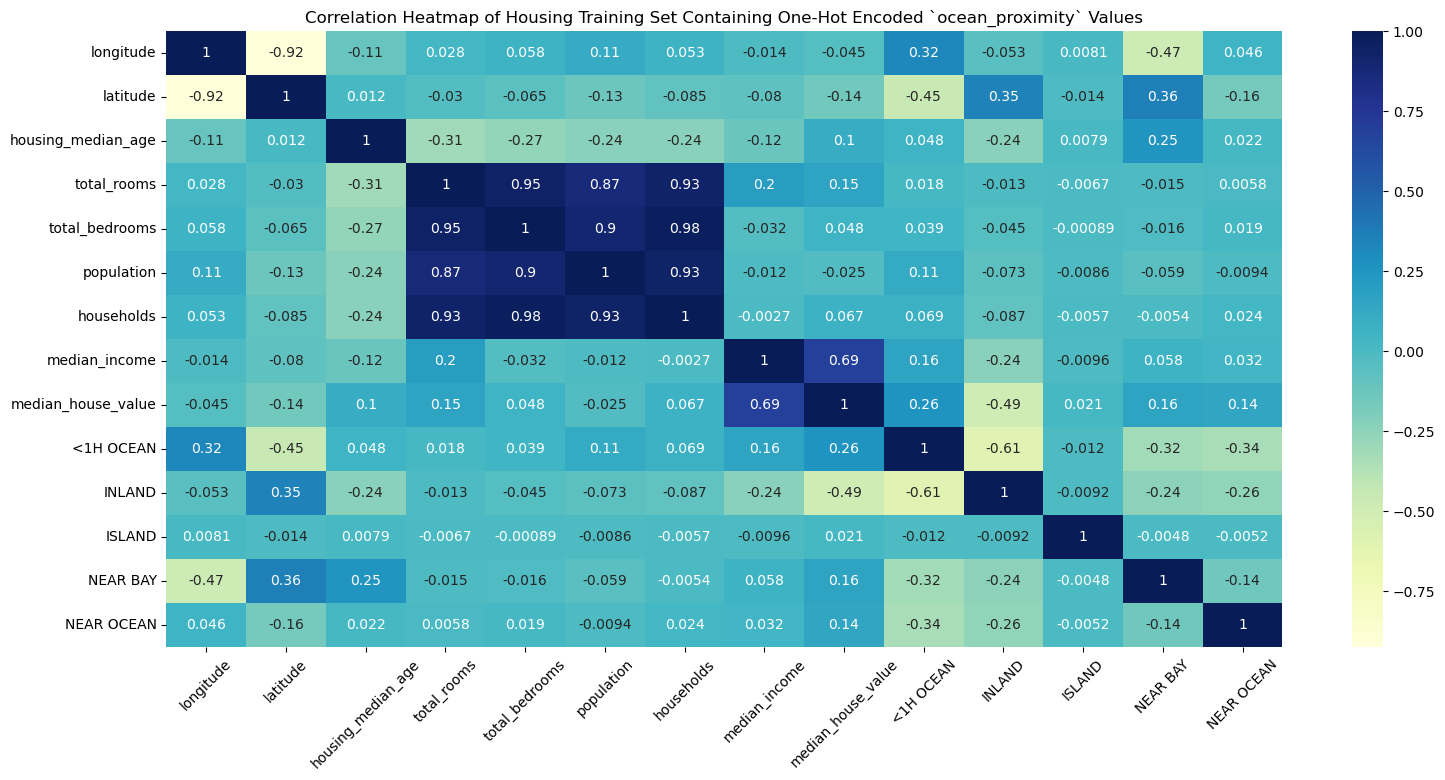

In [287]:
# plot correlation heatmap containing one-hot encoded ocean_proximity feature
plt.figure(figsize=(18, 8))
plt.title('Correlation Heatmap of Housing Training Set Containing One-Hot Encoded `ocean_proximity` Values')
sns.heatmap(training_set.corr(), annot=True, cmap='YlGnBu')
plt.xticks(rotation=45)
plt.show()

Note: The heatmap shows that homes being in close proximity to the ocean (`<1HR OCEAN`), near oceans (`NEAR OCEAN`) or near bays (`NEAR BAY`) are positively correlated with the home value (`median_house_value`), indicating that homes are generally more valuable in the marketplace as they are close to the Pacific.

#### Plot an Approximate Latitude-Longitude Map Emphasizing Home Prices

<Axes: title={'center': 'Median House Value at Approximate Californian Latitude and Longitude'}, xlabel='latitude', ylabel='longitude'>

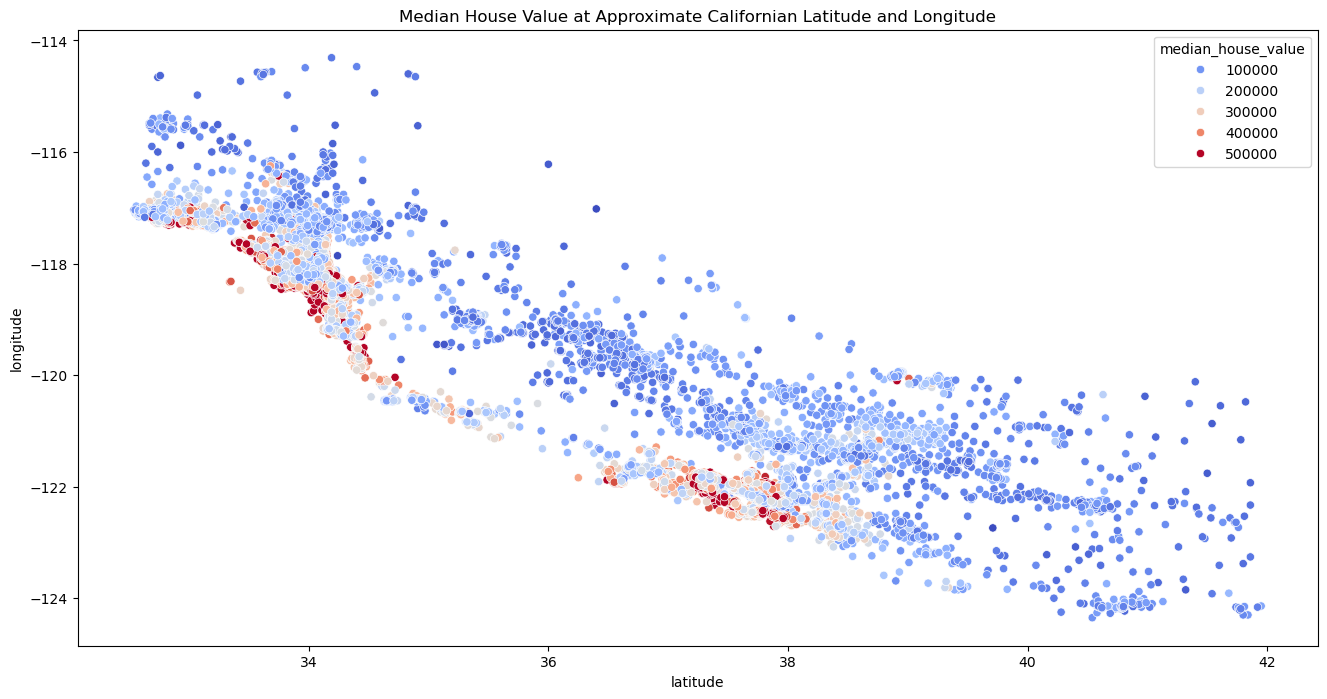

In [288]:
plt.figure(figsize=(16,8))
plt.title("Median House Value at Approximate Californian Latitude and Longitude")
sns.scatterplot(x='latitude', y='longitude', data=training_set, hue='median_house_value', palette='coolwarm')

#### Define New Feature `bedroom_ratio` As Proportion of All Rooms Which Are Bedrooms, and `household_rooms` As Ratio of Rooms to Households

In [289]:
# define new feature bedroom_ratio as proportion of all rooms which are bedrooms in a given home
training_set['bedroom_ratio'] = training_set['total_bedrooms'] / training_set['total_rooms']
training_set['household_rooms'] = training_set['total_rooms'] / training_set['households']
training_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
11137,-117.96,33.85,35.0,7.069874,5.257495,6.343880,5.231109,4.1250,189200.0,True,False,False,False,False,0.743648,1.351506
19748,-122.23,40.20,17.0,6.637258,4.934474,5.777652,4.941642,4.2917,128800.0,False,True,False,False,False,0.743451,1.343128
3418,-118.41,34.28,32.0,7.853605,6.276643,7.867106,6.159095,3.7566,146700.0,True,False,False,False,False,0.799205,1.275123
9135,-118.37,34.43,11.0,9.760771,7.961021,9.073604,7.938802,5.9507,225200.0,False,True,False,False,False,0.815614,1.229502
13013,-121.26,38.70,9.0,8.963544,7.207119,8.094378,7.072422,4.3826,146600.0,False,True,False,False,False,0.804048,1.267394


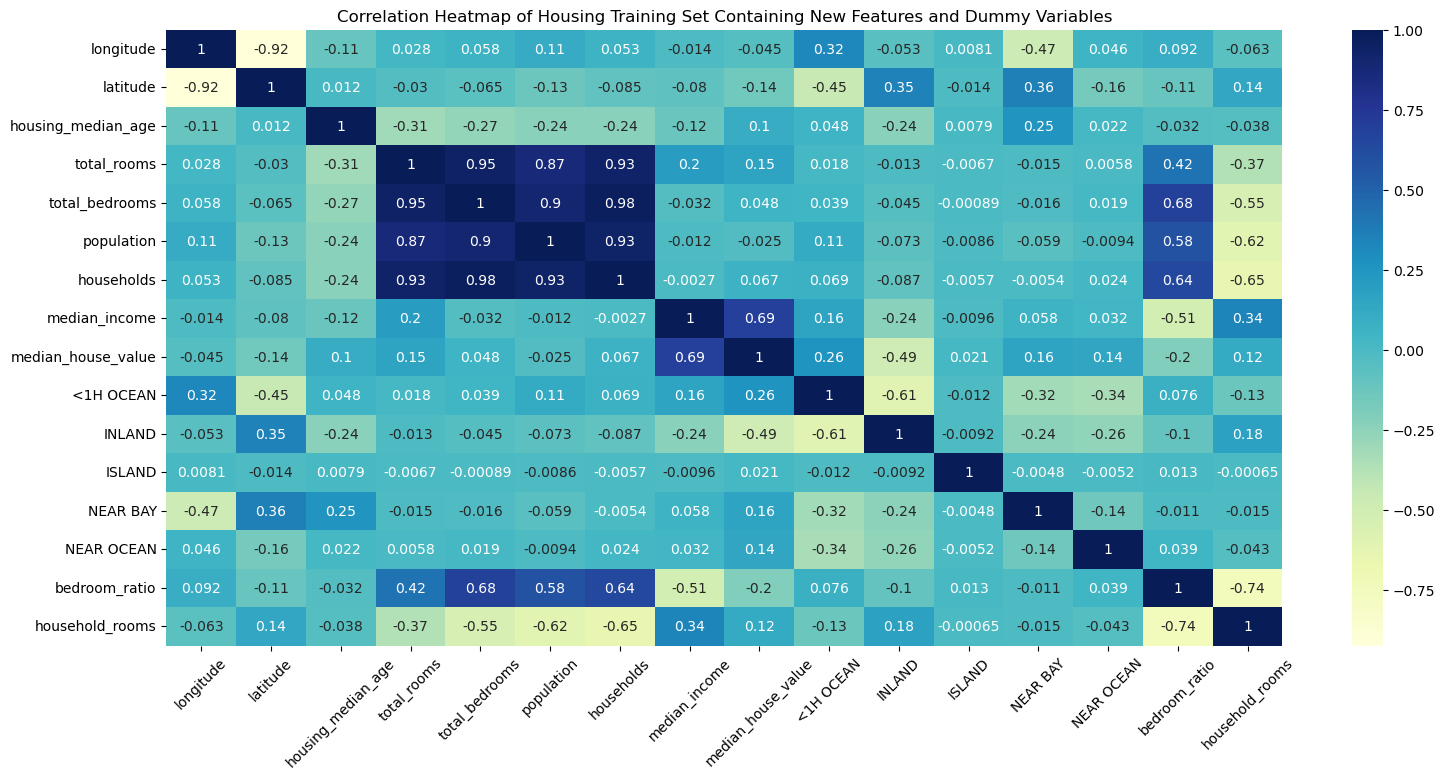

In [325]:
plt.figure(figsize=(18, 8))
plt.title('Correlation Heatmap of Housing Training Set Containing New Features and Dummy Variables')
sns.heatmap(training_set.corr(), annot=True, cmap='YlGnBu')
plt.xticks(rotation=45)
plt.show()

Note: The feature `bedroom_ratio` does not appear to be of much importance in predicting median_house_value, the target variable.

### 2. Linear Regression Model to Predict `median_house_value`

#### Data Preprocessing and Feature Engineering

In [291]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [292]:
# split X, y on training set
x_train, y_train = training_set.drop(columns=['median_house_value']), training_set['median_house_value']

In [293]:
# build scaler model to scale the X feature data
scaler = StandardScaler()

# fit-transform X training data
x_train_scaled = scaler.fit_transform(x_train)

In [294]:
# build linear regression model to scaled training data
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [295]:
# reaggregate test set 
test_set = x_test.join(y_test)

# log-transform the likewise features in the training set
test_set['total_rooms'] = np.log(test_set['total_rooms'] + 1)
test_set['total_bedrooms'] = np.log(test_set['total_bedrooms'] + 1)
test_set['population'] = np.log(test_set['population'] + 1)
test_set['households'] = np.log(test_set['households'] + 1)

# get dummy variables for the test set ocean_proximity feature
test_set = test_set.join(pd.get_dummies(test_set.ocean_proximity)).drop(columns=['ocean_proximity'])

# define bedroom_ratio and household_rooms rational features in test set
test_set['bedroom_ratio'] = test_set['total_bedrooms'] / test_set['total_rooms']
test_set['household_rooms'] = test_set['total_rooms'] / test_set['households']

# split X and y in test set
x_test, y_test = test_set.drop(columns=['median_house_value']), test_set['median_house_value']

# view test set results
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12230,-116.95,33.75,23.0,8.450412,7.000334,7.926964,6.964136,1.7847,109500.0,False,True,False,False,False,0.828402,1.213419
13657,-117.30,34.05,7.0,8.449557,7.022868,7.837949,6.953684,3.4228,115700.0,False,True,False,False,False,0.831152,1.215119
3535,-118.55,34.27,25.0,8.501064,6.495266,7.688913,6.439350,8.1356,352800.0,True,False,False,False,False,0.764053,1.320174
3223,-119.68,36.32,28.0,7.189922,5.624018,6.773080,5.484797,2.5833,54400.0,False,True,False,False,False,0.782208,1.310882
8032,-118.13,33.83,44.0,7.444833,5.811141,6.668228,5.843544,4.2917,314700.0,True,False,False,False,False,0.780560,1.274027


In [296]:
# view training set to ensure columnar homogeneity prior to scoring
training_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
11137,-117.96,33.85,35.0,7.069874,5.257495,6.343880,5.231109,4.1250,189200.0,True,False,False,False,False,0.743648,1.351506
19748,-122.23,40.20,17.0,6.637258,4.934474,5.777652,4.941642,4.2917,128800.0,False,True,False,False,False,0.743451,1.343128
3418,-118.41,34.28,32.0,7.853605,6.276643,7.867106,6.159095,3.7566,146700.0,True,False,False,False,False,0.799205,1.275123
9135,-118.37,34.43,11.0,9.760771,7.961021,9.073604,7.938802,5.9507,225200.0,False,True,False,False,False,0.815614,1.229502
13013,-121.26,38.70,9.0,8.963544,7.207119,8.094378,7.072422,4.3826,146600.0,False,True,False,False,False,0.804048,1.267394


#### Score Model

In [297]:
# use StandardScaler() to fit-transform x testing data
x_test_scaled = scaler.transform(x_test)

# score using x_test_scaled and y_test
print(f"Lin. Reg. Model R^2 Score: {lr.score(x_test_scaled, y_test)}")

Lin. Reg. Model R^2 Score: 0.6673759753723743


### 3. Random Forest Regressor Model to Predict `median_house_value`

#### Build, Train and Score Random Forest Regressor Model

In [309]:
# import regressor model
from sklearn.ensemble import RandomForestRegressor

In [303]:
forest = RandomForestRegressor()

forest.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [304]:
forest.score(x_test_scaled, y_test)

0.817589278366919

#### Tune Hyperparameters Using Grid-Search with Cross-Validation

In [308]:
# import grid-search with cross-validation
from sklearn.model_selection import GridSearchCV

In [321]:
# build clean random forest regressor for the grid search
forest = RandomForestRegressor()

# build parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

# build grid search
grid_search = GridSearchCV(forest, param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# fit grid search
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [323]:
# get the best estimator from the grid search
best_forest = grid_search.best_estimator_
print(best_forest)

RandomForestRegressor(n_estimators=300)


In [324]:
# score the forest based on the best estimator
best_forest.score(x_test_scaled, y_test)

0.8198444029788239

### 4. Post-Hoc Analyses

* Homes in California tend to be more expensive as they are positioned nearer the Pacific coast, and become less expensive as they are positioned further inland. The chart from section 2, file entitled 'geographical_home_values.png' in the directory, visualizes this observation.

* According to the correlation matrix, visualized using the heatmap (entitled 'full_corr_matrix.png' in the directory), the strongest single-variable predictor of median house price is median income, with 69% of variance in median house price for a given home being determined by median income for households residing within a block of the house.

* The R^2 score of the linear model is approximately 0.67, indicating a moderate (but not strong) positive relationship between the features and the target predictor of median home value. 

* The random forest regressor model had a much better performance than the linear model, with the best number of estimators being 300, achieving an R^2 score of approximately 0.82. 